In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC, SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('cell_samples.csv')

In [3]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [6]:
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [7]:
ben_df = df[df['Class']==2][0:200]
mal_df = df[df['Class']==4][0:200]


In [8]:
cell_df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

C:\Users\hassa\AppData\Local\Temp\ipykernel_6200\1666221151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [9]:
df = cell_df.copy()

In [10]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [11]:
df.drop(['ID'], axis=1, inplace=True)

In [12]:
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [13]:
X = df.drop('Class', axis=1)
Y = df['Class']
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size=0.2, random_state=42)

# C-SVM

In [14]:
ls_svm = SVC(C=1.0, kernel='rbf')  # LS-SVM for classification
ls_svm.fit(xtrain, ytrain)


SVC()

In [15]:
y_pred = ls_svm.predict(xtest)

In [16]:
accuracy = accuracy_score(ytest, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(ytest,y_pred))

Accuracy: 0.948905109489051
              precision    recall  f1-score   support

           2       0.94      0.97      0.96        79
           4       0.96      0.91      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137



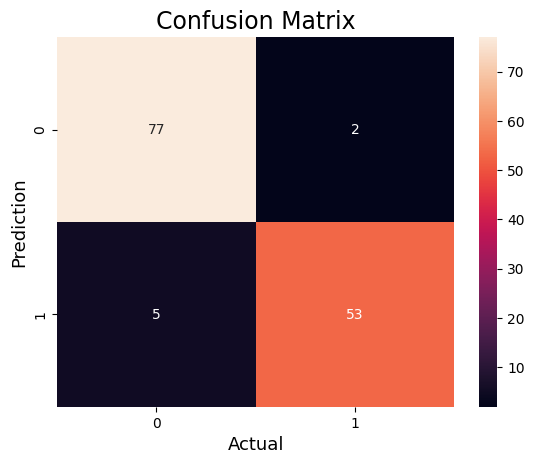

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_pred)
sns.heatmap(cm, annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Nu-SVM

In [18]:
nu_svm = NuSVC(kernel='rbf', nu=0.5)  # You can adjust the 'nu' parameter
nu_svm.fit(xtrain, ytrain)

NuSVC()

In [19]:
y_pred = nu_svm.predict(xtest)

In [20]:
accuracy = accuracy_score(ytest, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(ytest,y_pred))

Accuracy: 0.9635036496350365
              precision    recall  f1-score   support

           2       0.96      0.97      0.97        79
           4       0.96      0.95      0.96        58

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



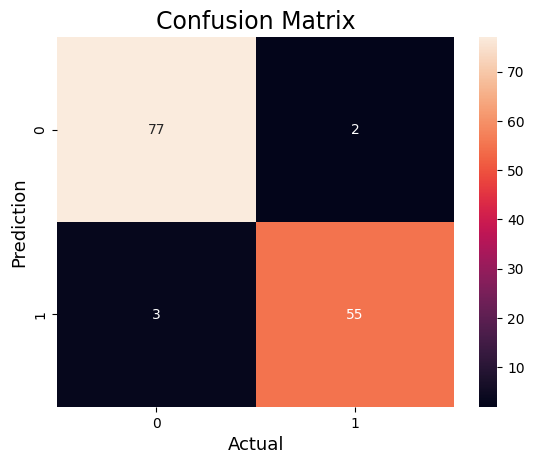

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_pred)
sns.heatmap(cm, annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()